In [1]:
%matplotlib inline

# Problem Set #6: Heart Failure Dataset

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from collections import defaultdict
import random
import patsy
import math

import models

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv", sep = ",")
df[0:10]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


All of the data was converted into integers or floats in the dataset already, meaning that all of the boolean data is already saved as binary. It looks like there are 299 observations and no null values in the dataset.

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis

## Age

This variable is numerical and refers to the age of the patient being observed.

In [6]:
df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

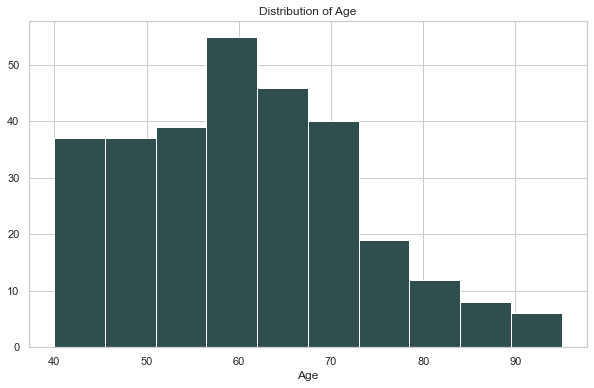

In [7]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.age, color="darkslategray")
axes.set_title("Distribution of Age")
axes.set_xlabel("Age")

plt.show()
plt.close()

Most of the patients observed in this dataset were between the age of 40 and 70, with the mean age being about 61 years old.

## Anaemia

This variable is of type boolean and therefore is categorical, 1 means that there is decrease in red blood cells, 0 means that there is not.

In [8]:
df.anaemia.describe()

count    299.000000
mean       0.431438
std        0.496107
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: anaemia, dtype: float64

In [9]:
df.anaemia.value_counts(normalize=True)

0    0.568562
1    0.431438
Name: anaemia, dtype: float64

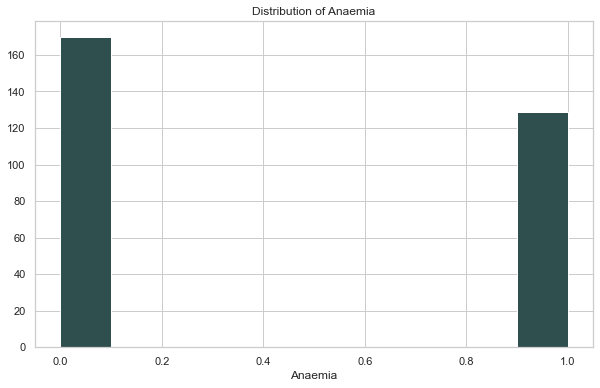

In [10]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.anaemia, color="darkslategray")
axes.set_title("Distribution of Anaemia")
axes.set_xlabel("Anaemia")

plt.show()
plt.close()

It looks like more patients observed did not have a decrease in red blood.

## Creatinine Phosphokinase	

This variable is numerical and refers to the level of the CPK enzyme in the patient's blood.

In [11]:
df.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

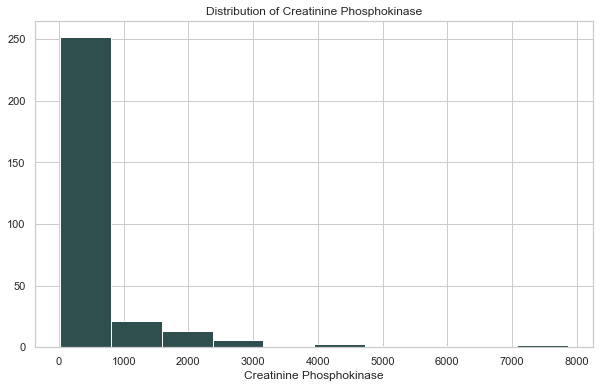

In [12]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.creatinine_phosphokinase, color="darkslategray")
axes.set_title("Distribution of Creatinine Phosphokinase")
axes.set_xlabel("Creatinine Phosphokinase")

plt.show()
plt.close()

Most patients seem to have low creatinine phosphokinase.

## Diabetes

This is technically a categorical variable as it is a boolean that holds the value 1 if the patient has diabetes, and the value 0 is the patient does not.

In [13]:
df.diabetes.describe()

count    299.000000
mean       0.418060
std        0.494067
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diabetes, dtype: float64

In [14]:
df.diabetes.value_counts(normalize=True)

0    0.58194
1    0.41806
Name: diabetes, dtype: float64

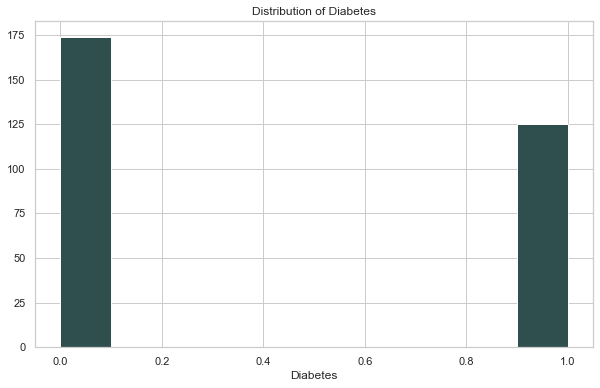

In [15]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.diabetes, color="darkslategray")
axes.set_title("Distribution of Diabetes")
axes.set_xlabel("Diabetes")

plt.show()
plt.close()

It seems most patients did not have diabetes.

## Ejection Fraction

This is a numerical variable refering to the percentage of blood leaving the heart at each contraction.

In [16]:
df.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

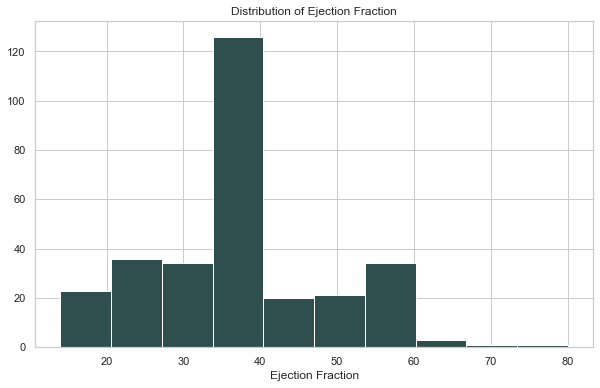

In [17]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.ejection_fraction, color="darkslategray")
axes.set_title("Distribution of Ejection Fraction")
axes.set_xlabel("Ejection Fraction")

plt.show()
plt.close()

The mean for ejection fraction is at around 38%.

## High Blood Pressure	

This is a boolean (categorical) variable that holds 1 if the patient has hypertension and 0 if they do not.

In [18]:
df.high_blood_pressure.describe()

count    299.000000
mean       0.351171
std        0.478136
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: high_blood_pressure, dtype: float64

In [19]:
df.high_blood_pressure.value_counts(normalize=True)

0    0.648829
1    0.351171
Name: high_blood_pressure, dtype: float64

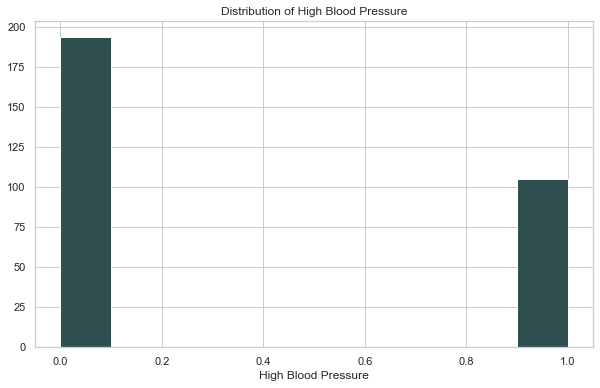

In [20]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.high_blood_pressure, color="darkslategray")
axes.set_title("Distribution of High Blood Pressure")
axes.set_xlabel("High Blood Pressure")

plt.show()
plt.close()

Most patients do not seem to have high blood pressure.

## Platelets

This is a numerical variable that holds the number of platelets that are in the patient's blood.

In [21]:
df.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

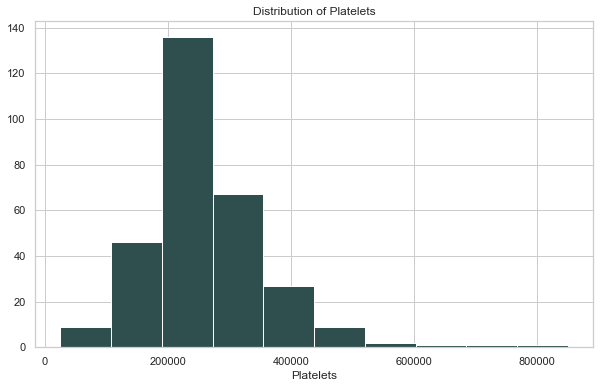

In [22]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.platelets, color="darkslategray")
axes.set_title("Distribution of Platelets")
axes.set_xlabel("Platelets")

plt.show()
plt.close()

It looks like the distribution of platelets is pretty normal.

## Serum Creatinine

This numerical variable holds the level of serum creatinine that is in the patient's blood.

In [23]:
df.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

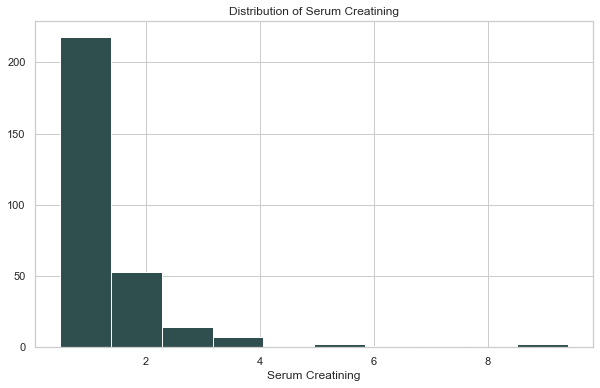

In [24]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.serum_creatinine, color="darkslategray")
axes.set_title("Distribution of Serum Creatining")
axes.set_xlabel("Serum Creatining")

plt.show()
plt.close()

The distribution for serum creatining is very much right skewed.

## Serum Sodium

This numerical variable holds the levels of serum sodium in the blood of the patients.

In [25]:
df.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

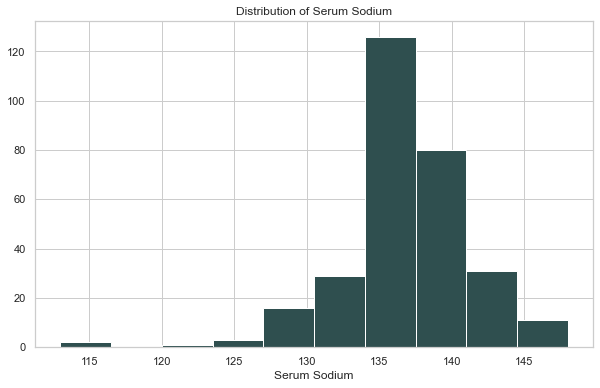

In [26]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.serum_sodium, color="darkslategray")
axes.set_title("Distribution of Serum Sodium")
axes.set_xlabel("Serum Sodium")

plt.show()
plt.close()

## Sex

This categorical variable holds a 1 for men and a 0 for women.

In [27]:
df.sex.describe()

count    299.000000
mean       0.648829
std        0.478136
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [28]:
df.sex.value_counts(normalize=True)

1    0.648829
0    0.351171
Name: sex, dtype: float64

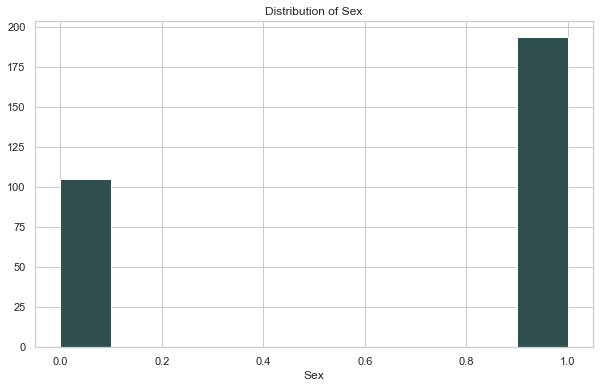

In [29]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.sex, color="darkslategray")
axes.set_title("Distribution of Sex")
axes.set_xlabel("Sex")

plt.show()
plt.close()

It seems like most of the patients were male.

## Smoking

This categorical variable is a boolean that holds whether or not the patient smokes.

In [30]:
df.smoking.describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: smoking, dtype: float64

In [31]:
df.smoking.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: smoking, dtype: float64

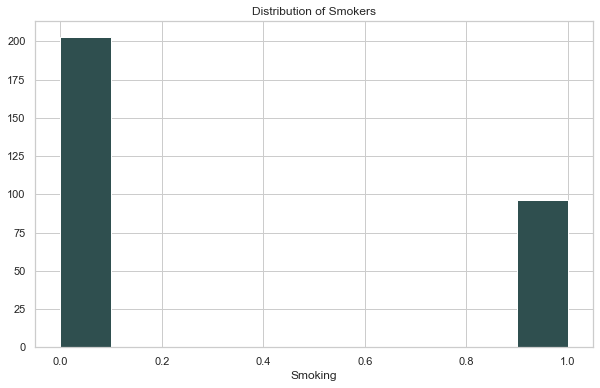

In [32]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.smoking, color="darkslategray")
axes.set_title("Distribution of Smokers")
axes.set_xlabel("Smoking")

plt.show()
plt.close()

Most of the patients observed were non-smokers.

## Time

This numerical variable holds the number of days for the follow-up period.

In [33]:
df.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

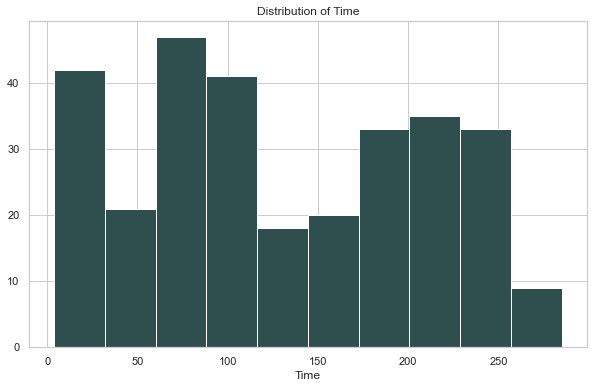

In [34]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.time, color="darkslategray")
axes.set_title("Distribution of Time")
axes.set_xlabel("Time")

plt.show()
plt.close()

## Death Event

This boolean holds a 1 if the patient died during the follow-up period, and a 0 if they did not.

In [35]:
df.DEATH_EVENT.describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

In [36]:
df.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

Almost 68% of patients did not die during the follow-up period.

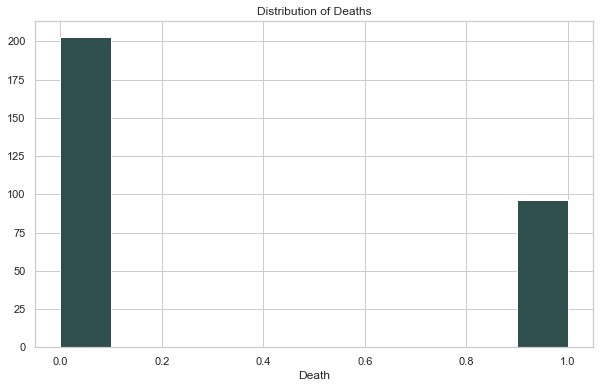

In [37]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.DEATH_EVENT, color="darkslategray")
axes.set_title("Distribution of Deaths")
axes.set_xlabel("Death")

plt.show()
plt.close()

It seems most patients did not die during the follow-up period.

## Death v Age

In [38]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [39]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.age)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.age)[0])

r   =  0.2537285430880036
rho =  0.21812456533142766


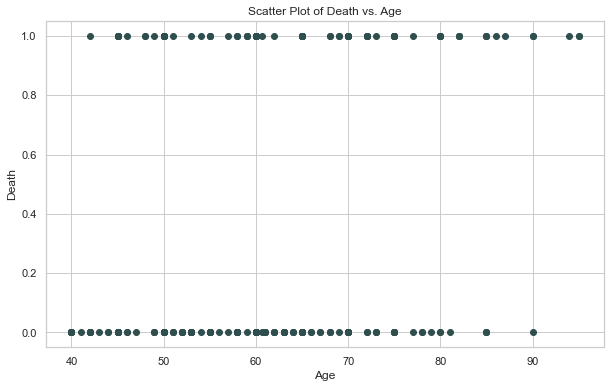

In [40]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.age, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Age")
axes.set_title("Scatter Plot of Death vs. Age")

plt.show()
plt.close()

Although it doesn't seem like there is much of a correlation from looking at $R^2$, we can see that the range for death was between 45 and 100 years old while the range for no death was between 40 and 90.

## Death v Anaemia

In [41]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.anaemia)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.anaemia)[0])

r   =  0.06627009846028784
rho =  0.06627009846028782


In [42]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [43]:
describe_by_category(df, "DEATH_EVENT", "anaemia", transpose=True)

anaemia           0           1
count    170.000000  129.000000
mean       0.294118    0.356589
std        0.456991    0.480859
min        0.000000    0.000000
25%        0.000000    0.000000
50%        0.000000    0.000000
75%        1.000000    1.000000
max        1.000000    1.000000


From the data, it looks like people with anaemia are a tiny bit more likely to die from heart failure than people without anaemia.

## Death v Creatinine Phosphokinase

In [44]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.creatinine_phosphokinase)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.creatinine_phosphokinase)[0])

r   =  0.06272816025237471
rho =  0.02361592743410125


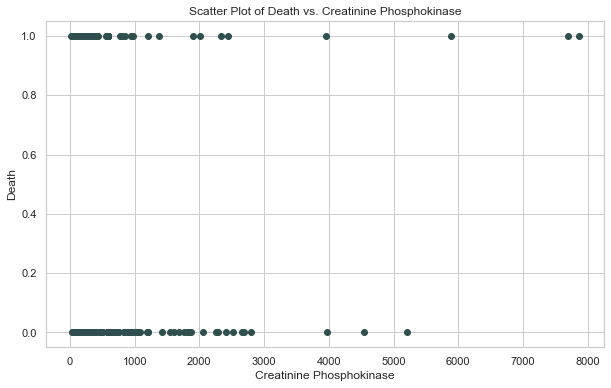

In [45]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.creatinine_phosphokinase, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Creatinine Phosphokinase")
axes.set_title("Scatter Plot of Death vs. Creatinine Phosphokinase")

plt.show()
plt.close()

## Death v Diabetes

In [46]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.diabetes)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.diabetes)[0])

r   =  -0.001942883344203488
rho =  -0.0019428833442034865


In [47]:
describe_by_category(df, "DEATH_EVENT", "diabetes", transpose=True)

diabetes           0           1
count     174.000000  125.000000
mean        0.321839    0.320000
std         0.468530    0.468353
min         0.000000    0.000000
25%         0.000000    0.000000
50%         0.000000    0.000000
75%         1.000000    1.000000
max         1.000000    1.000000


It doesn't look like diabetes has any affect on whether someone will die from heart failure.

## Death v Ejection Fraction

In [48]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.ejection_fraction)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.ejection_fraction)[0])

r   =  -0.2686033123940619
rho =  -0.2868685329791511


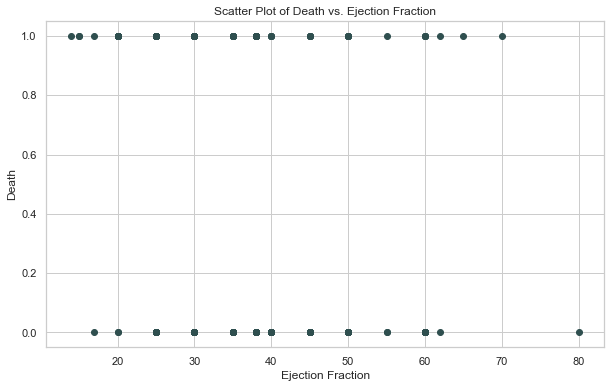

In [49]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.ejection_fraction, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Ejection Fraction")
axes.set_title("Scatter Plot of Death vs. Ejection Fraction")

plt.show()
plt.close()

From looking at $R^2$ and the scatter plot, it's clear that there is almost no correlation between death from heart failure and ejection fraction.

## Death v High Blood Pressure

In [50]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.high_blood_pressure)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.high_blood_pressure)[0])

r   =  0.07935105769128534
rho =  0.07935105769128536


In [51]:
describe_by_category(df, "DEATH_EVENT", "high_blood_pressure", transpose=True)

high_blood_pressure           0           1
count                194.000000  105.000000
mean                   0.293814    0.371429
std                    0.456687    0.485504
min                    0.000000    0.000000
25%                    0.000000    0.000000
50%                    0.000000    0.000000
75%                    1.000000    1.000000
max                    1.000000    1.000000


Although there isn't much correlation once again, it looks like people with high blood pressure are a little bit more likely to die from heart failure than people without it.

## Death v Platelets

In [52]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.platelets)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.platelets)[0])

r   =  -0.04913886798037428
rho =  -0.046199760077033435


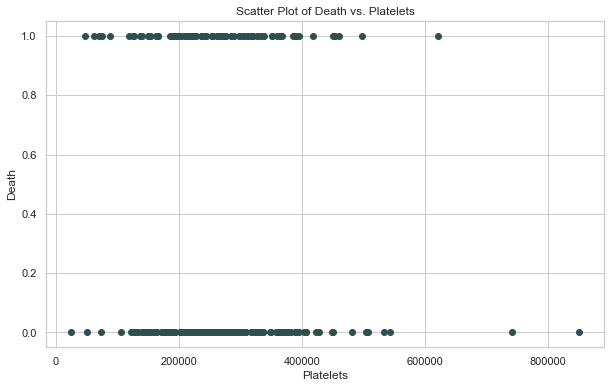

In [53]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.platelets, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Platelets")
axes.set_title("Scatter Plot of Death vs. Platelets")

plt.show()
plt.close()

## Death v Serum Creatinine

In [54]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.serum_creatinine)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.serum_creatinine)[0])

r   =  0.29427756098414914
rho =  0.3706300414435275


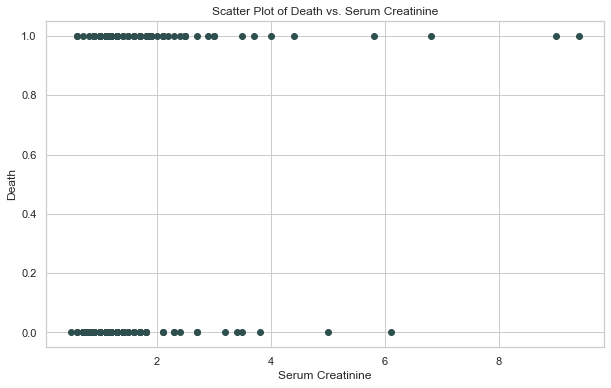

In [55]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.serum_creatinine, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Serum Creatinine")
axes.set_title("Scatter Plot of Death vs. Serum Creatinine")

plt.show()
plt.close()

## Death v Serum Sodium 

In [56]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.serum_sodium)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.serum_sodium)[0])

r   =  -0.19520359641640117
rho =  -0.20983690905972469


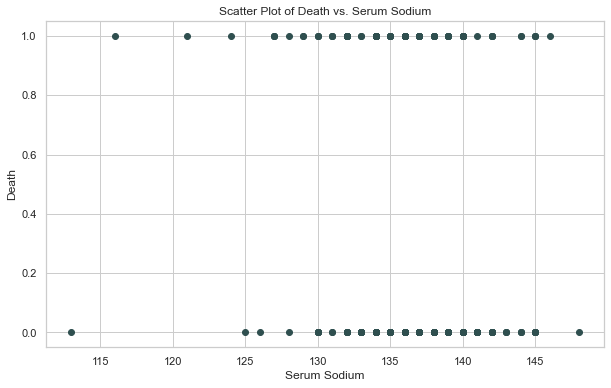

In [57]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.serum_sodium, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Serum Sodium")
axes.set_title("Scatter Plot of Death vs. Serum Sodium")

plt.show()
plt.close()

## Death v Sex

In [58]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.sex)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.sex)[0])

r   =  -0.004316376319703049
rho =  -0.004316376319703062


In [59]:
describe_by_category(df, "DEATH_EVENT", "sex", transpose=True)

sex             0           1
count  105.000000  194.000000
mean     0.323810    0.319588
std      0.470173    0.467523
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


It looks like the gender of the patient does not affect whether or not they will die from heart failure.

## Death v Smoking

In [60]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.smoking)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.smoking)[0])

r   =  -0.012623152709359589
rho =  -0.012623152709359603


In [61]:
describe_by_category(df, "DEATH_EVENT", "smoking", transpose=True)

smoking           0          1
count    203.000000  96.000000
mean       0.325123   0.312500
std        0.469579   0.465946
min        0.000000   0.000000
25%        0.000000   0.000000
50%        0.000000   0.000000
75%        1.000000   1.000000
max        1.000000   1.000000


It looks like wether or not the patient is a smoker does not affect if they will die from heart failure, which is pretty surprising and it makes me wonder if it doesn't have something to do with the fact that there is much more data on non-smokers than there is on smokers.

## Death v Time

In [62]:
print("r   = ", stats.pearsonr( df.DEATH_EVENT, df.time)[0])
print("rho = ", stats.spearmanr( df.DEATH_EVENT, df.time)[0])

r   =  -0.526963779277577
rho =  -0.5431786961003566


Very surprised that the follow-up time has the strongest negative correlation with death from heart failure.

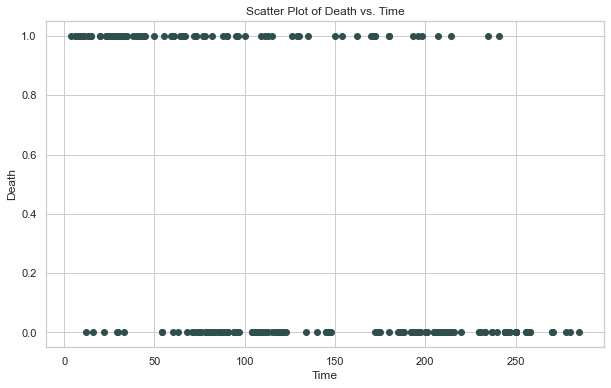

In [63]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( df.time, df.DEATH_EVENT, marker="o", color="darkslategray")

axes.set_ylabel("Death")
axes.set_xlabel("Time")
axes.set_title("Scatter Plot of Death vs. Time")

plt.show()
plt.close()

In [64]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

In [65]:
correlations(df, 'DEATH_EVENT', ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"])


,feature,r,rho
0,age,0.253729,0.218125
1,anaemia,0.066270,0.066270
2,creatinine_phosphokinase,0.062728,0.023616
3,diabetes,-0.001943,-0.001943
4,ejection_fraction,-0.268603,-0.286869
5,high_blood_pressure,0.079351,0.079351
6,platelets,-0.049139,-0.046200
7,serum_creatinine,0.294278,0.370630
8,serum_sodium,-0.195204,-0.209837
9,sex,-0.004316,-0.004316


The results were pretty suprising as most of the relationships have very low correlation, here is a summary of what we saw:
1. age - 25% positive relationship
2. anaemia - low positive relationship
3. diabetes - no relationship, let's keep it out of the model
4. creatinine phosphokinase - low positive realtionship
5. ejection fraction - 27% negative relationship
6. high blood pressure - low positive relationship
7. platelets - low negative relationship
8. serum creatinine - 30% positive relationship
9. serum sodium - 20% negative relationship
10. sex - low negative relationship
11. smoking - low negative relationship
12. time - strongest negative relationship (53%)

In [66]:
initial_model = "DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + ejection_fraction + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoking + time"
initial_result = models.bootstrap_linear_regression(initial_model, df)
models.describe_bootstrap_lr(initial_result)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,1.71,0.51,3.03
age,$\beta_{1}$,0.01,0.00,0.01
anaemia,$\beta_{2}$,-0.00,-0.12,0.09
creatinine_phosphokinase,$\beta_{3}$,0.00,-0.00,0.00
ejection_fraction,$\beta_{4}$,-0.01,-0.01,-0.01
high_blood_pressure,$\beta_{5}$,-0.01,-0.10,0.05
platelets,$\beta_{6}$,-0.00,-0.00,0.00
serum_creatinine,$\beta_{7}$,0.08,0.02,0.13
serum_sodium,$\beta_{8}$,-0.01,-0.02,0.00


In [67]:
def plot_residuals(result, variables):
    figure = plt.figure(figsize=(20,20))
    
    plots = len( variables)
    rows = (plots // 3) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 3, i + 1)

        keyed_values = sorted(zip(df[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

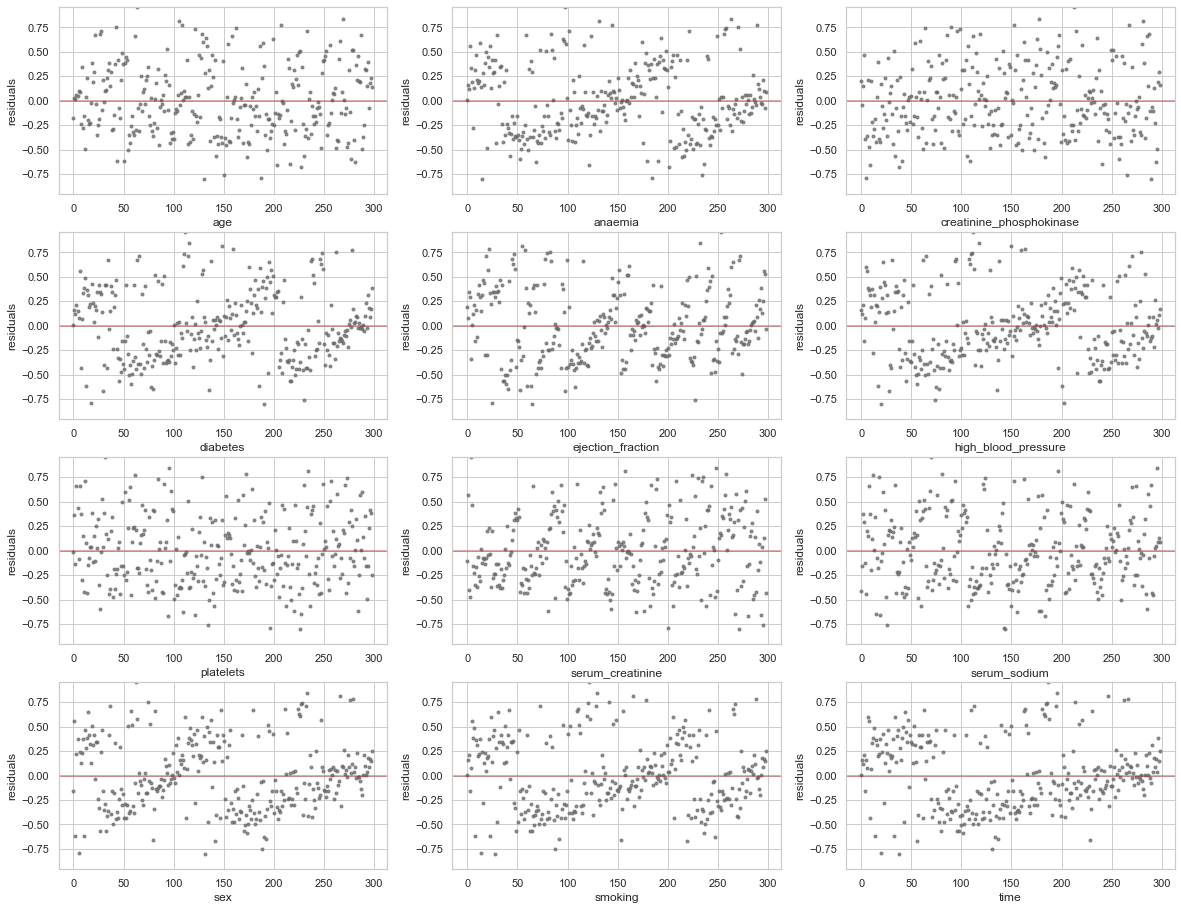

In [68]:
initial_residuals = plot_residuals(initial_result, ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"])

In [69]:
df["log_age"] = df["age"].apply(np.log)
df["log_creatinine_phosphokinase"] = df["creatinine_phosphokinase"].apply(np.log)
df["log_serum_creatinine"] = df["serum_creatinine"].apply(np.log)
df["log_serum_sodium"] = df["serum_sodium"].apply(np.log)
df["log_ejection_fraction"] = df["ejection_fraction"].apply(np.log)
df["log_time"] = df["time"].apply(np.log)

In [70]:
final_model = "DEATH_EVENT ~ log_age + log_creatinine_phosphokinase + log_ejection_fraction + high_blood_pressure + log_serum_creatinine + log_serum_sodium + sex + log_time"
final_result = models.bootstrap_linear_regression(final_model, df)
models.describe_bootstrap_lr(final_result)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,2.80,-3.24,8.78
log_age,$\beta_{1}$,0.27,0.10,0.44
log_creatinine_phosphokinase,$\beta_{2}$,0.04,0.01,0.07
log_ejection_fraction,$\beta_{3}$,-0.35,-0.46,-0.24
high_blood_pressure,$\beta_{4}$,0.00,-0.08,0.08
log_serum_creatinine,$\beta_{5}$,0.21,0.11,0.30
log_serum_sodium,$\beta_{6}$,-0.28,-1.45,1.04
sex,$\beta_{7}$,-0.07,-0.14,0.01
log_time,$\beta_{8}$,-0.26,-0.31,-0.21


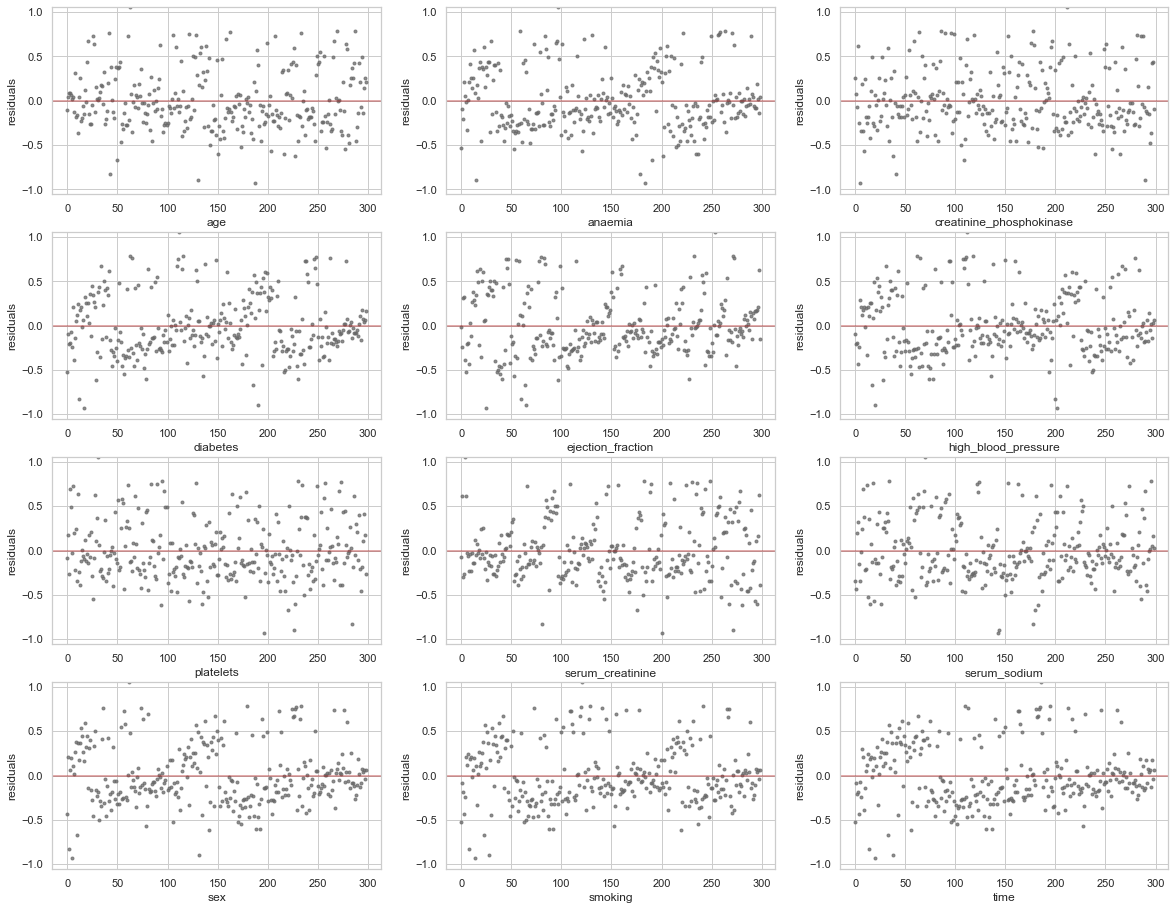

In [71]:
second_residuals = plot_residuals(final_result, ["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets","serum_creatinine","serum_sodium","sex","smoking","time"])

# Prediction

If we look at the Null model, we have an estimated percentage of deaths from heart failures of:

In [72]:
df.DEATH_EVENT.mean()

0.3210702341137124

with an error of:

In [73]:
df.DEATH_EVENT.std()

0.4676704280567721

In [74]:
model = final_result['formula']
henry = [1, 4.1, 5.4, 2.9, 1, 0.6, 4.8, 1, 3.2]
prediction = final_result["model"].predict([henry])
prediction

array([[1.00547388]])

In [75]:
prediction[0][0] - 1.96 * final_result["sigma"], prediction[0][0] + 1.96 * final_result["sigma"]

(0.3316789112410897, 1.679268848851292)

In [76]:
def chunk(xs, n):
    k, m = divmod(len(xs), n)
    return [xs[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

In [77]:
def cross_validation(algorithm, formula, data, evaluate, fold_count=10, repetitions=3):
    indices = list(range(len( data)))
    metrics = []
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[fold]
            train_indices = [idx not in fold for idx in indices]
            train_data = data.iloc[train_indices]
            result = algorithm(formula, data=train_data)
            model = result["model"]
            y, X = patsy.dmatrices(formula, test_data, return_type="matrix")
            # y = np.ravel( y) # might need for logistic regression
            results = models.summarize(formula, X, y, model)
            metric = evaluate(results)
            metrics.append(metric)
    return metrics

In [78]:
result = cross_validation(models.linear_regression, model, df, lambda r: (r["sigma"], r["r_squared"]))

In [79]:
print(r"95% CI for sigma:", stats.mstats.mquantiles([r[0] for r in result], [0.025, 0.975]))

95% CI for sigma: [0.29655211 0.49881846]


In [80]:
print(r"95% CI for R^2:", stats.mstats.mquantiles([r[1] for r in result], [0.025, 0.975]))

95% CI for R^2: [0.07299633 0.70251862]


In [81]:
sigmas = [r[0] for r in result]
r_squareds = [r[1] for r in result]

In [82]:
print("mean sigma: ", np.mean(sigmas))
print("mean R^2: ", np.mean(r_squareds))

mean sigma:  0.40283724756830297
mean R^2:  0.4549696329329354


In [83]:
def resample(data):
    n = len(data)
    return [data[ i] for i in [stats.randint.rvs(0, n - 1) for _ in range( 0, n)]]

In [84]:
bootstrap = {}
bootstrap["sigma"] = np.array([np.mean(s) for s in [resample(sigmas) for i in range( 0, 1000)]])
bootstrap["r_squared"] = np.array([np.mean(r) for r in [resample(r_squareds) for i in range( 0, 1000)]])

In [85]:
print(r"95% CI for *mean* sigma:", stats.mstats.mquantiles(bootstrap["sigma"], [0.025, 0.975]))

95% CI for *mean* sigma: [0.38727088 0.41789711]


In [86]:
print(r"95% CI for *mean* R^2:", stats.mstats.mquantiles(bootstrap["r_squared"], [0.025, 0.975]))

95% CI for *mean* R^2: [0.40442057 0.50407158]


In [87]:
from collections import defaultdict

In [88]:
def data_collection():
    result = dict()
    result[ "train"] = defaultdict( list)
    result[ "test"] = defaultdict( list)
    return result

In [89]:
 def learning_curves(algorithm, formula, data, evaluate, fold_count=10, repetitions=3, increment=1):
    indices = list(range(len( data)))
    results = data_collection()
    for _ in range(repetitions):
        random.shuffle(indices)
        folds = chunk(indices, fold_count)
        for fold in folds:
            test_data = data.iloc[ fold]
            train_indices = [idx for idx in indices if idx not in fold]
            train_data = data.iloc[train_indices]
            for i in list(range(increment, 100, increment)) + [100]: # ensures 100% is always picked.
                # the indices are already shuffled so we only need to take ever increasing chunks
                train_chunk_size = int( np.ceil((i/100)*len( train_indices)))
                train_data_chunk = data.iloc[train_indices[0:train_chunk_size]]
                # we calculate the model
                result = algorithm(formula, data=train_data_chunk)
                model = result["model"]
                # we calculate the results for the training data subset
                y, X = patsy.dmatrices( formula, train_data_chunk, return_type="matrix")
                result = models.summarize(formula, X, y, model)
                metric = evaluate(result)
                results["train"][i].append( metric)
                
                # we calculate the results for the test data.
                y, X = patsy.dmatrices( formula, test_data, return_type="matrix")
                result = models.summarize(formula, X, y, model)
                metric = evaluate(result)
                results["test"][i].append( metric)
            #
        #
    # process results
    # Rely on the CLT...
    statistics = {}
    for k, v in results["train"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["train"] = statistics
    statistics = {}
    for k, v in results["test"].items():
        statistics[ k] = (np.mean(v), np.std(v))
    results["test"] = statistics
    return results
#

In [90]:
result = learning_curves(models.linear_regression, model, df, lambda r: r["sigma"])

C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneD

C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneD

C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users

C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users\hadas\OneDrive\Documents\School\JHU\Data Science\Problem Set 6\models.py:42: RuntimeWarning: invalid value encountered in sqrt
  result["sigma"] = np.sqrt( sum_squared_error / (n - k))
C:\Users

In [91]:
def results_to_curves( curve, results):
    all_statistics = results[ curve]
    keys = list( all_statistics.keys())
    keys.sort()
    mean = []
    upper = []
    lower = []
    for k in keys:
        m, s = all_statistics[ k]
        mean.append( m)
        upper.append( m + 2 * s)
        lower.append( m - 2 * s)
    return keys, lower, mean, upper

In [92]:
def plot_learning_curves( results, metric, zoom=False):
    figure = plt.figure(figsize=(10,6))

    axes = figure.add_subplot(1, 1, 1)

    xs, train_lower, train_mean, train_upper = results_to_curves( "train", results)
    _, test_lower, test_mean, test_upper = results_to_curves( "test", results)

    axes.plot( xs, train_mean, color="steelblue")
    axes.fill_between( xs, train_upper, train_lower, color="steelblue", alpha=0.25, label="train")
    axes.plot( xs, test_mean, color="firebrick")
    axes.fill_between( xs, test_upper, test_lower, color="firebrick", alpha=0.25, label="test")
    axes.legend()
    axes.set_xlabel( "training set (%)")
    axes.set_ylabel( metric)
    axes.set_title("Learning Curves")

    if zoom:
        y_lower = int( 0.9 * np.amin([train_lower[-1], test_lower[-1]]))
        y_upper = int( 1.1 * np.amax([train_upper[-1], test_upper[-1]]))
        axes.set_ylim((y_lower, y_upper))

    plt.show()
    plt.close()
#

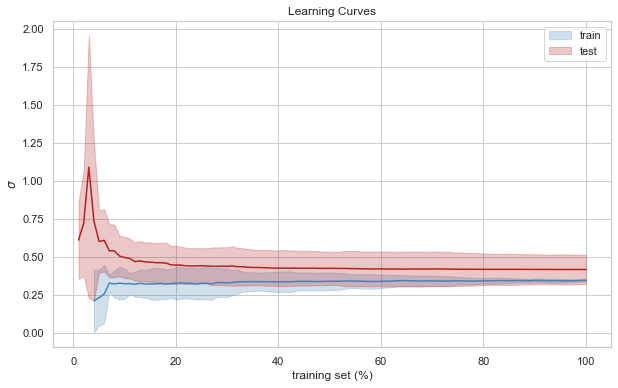

In [93]:
plot_learning_curves(result, r"$\sigma$")

Since the training and the testing lines converge, the addition of more data won't help our model be more accurate. Overall, I was surprised at the fact that all of the variables have very little correlation with whether someone will die from heart failure.